First define universal stuff

In [1]:
import numpy as np
import iDEA as idea
import matplotlib.pyplot as plt



Convergance testing for x grid points:

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...


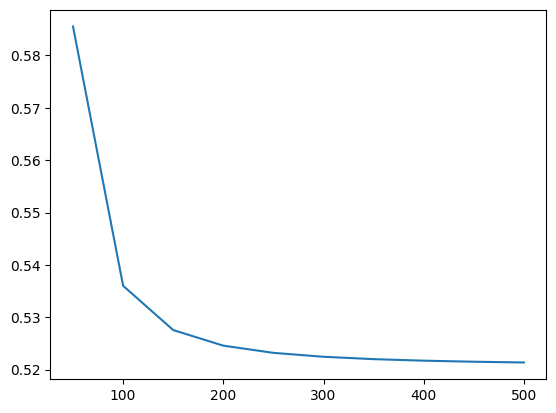

In [16]:
xtestspace = np.linspace(50,500,10).astype(int)


energies=[]
for xnumber in xtestspace:
    x = np.linspace(-30,30,xnumber)
    v_int = idea.interactions.softened_interaction(x)
    v_ext = -2*np.exp(-((x-20)**2)/10) - 2.005*np.exp(-((x+20)**2)/10) #gaussians
    
    system = idea.system.System(x,v_ext,v_int,electrons="uu")
    system_firststate = idea.methods.interacting.solve(system, k=1)
                                                      
    charge_density = idea.observables.density(system, state=system_firststate)
    hartree_potential = idea.observables.hartree_potential(system, charge_density)
    energies.append(idea.observables.hartree_energy(system, charge_density, hartree_potential))

plt.plot(xtestspace,energies)
plt.show()
    

C:\Users\Iansyst Loan\AppData\Local\Temp\ipykernel_6844\120183274.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(xtestspace, np.log10(energies-energies[-1]))


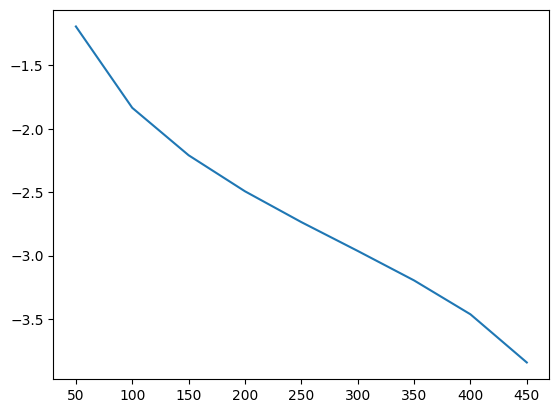

In [19]:
plt.plot(xtestspace, np.log10(energies-energies[-1]))
plt.show()